### Q1

Load the `mnist.npz` data file to variable `D`.

In [1]:
import numpy as np
# add your code below

f = "C:/Users/HP/OneDrive/Documents/Study/AI/AIclass/mnist.npz"
D = np.load(f)

# add your code above
if 'D' in locals():
    trn_lbl = D['train_labels']
    trn_img = D['train_imgs']
    print(trn_lbl.size)  # this should show 60000

60000


### Q2

This time, we'll try to differentiate between "**6**" and "**9**".

Pick out the labels and images of "6" and "9", and assign them to the variables `lbls` and `imgs`.

In [10]:
# add your code below

idx = (trn_lbl == 6) + (trn_lbl == 9)
lbls = trn_lbl[idx]
imgs = trn_img[idx]
# add your code above
if all([v in globals() for v in ['lbls', 'imgs']]):
    print(lbls.size)  # this should be 11867
    print(imgs.shape)  # this should be (11867, 28, 28)

11867
(11867, 28, 28)


### Q3

Display the first 48 images in `imgs` by plotting them in a 4 row, 6 column grid.

The figure should look like this:
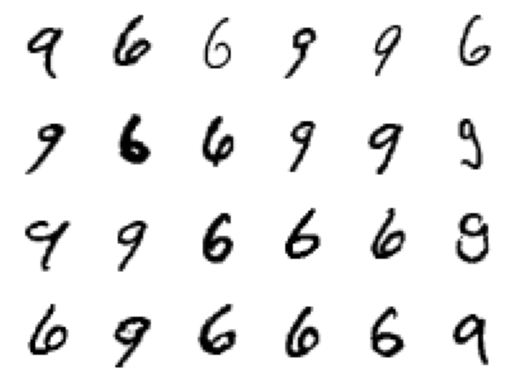

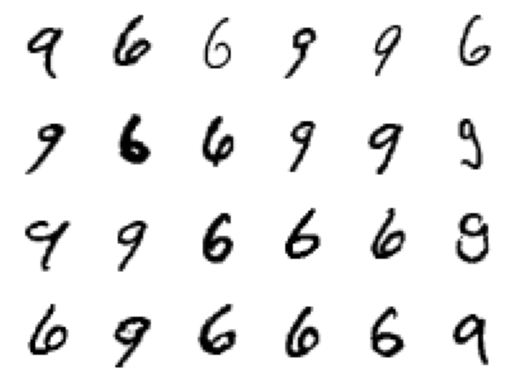

In [15]:
import matplotlib.pyplot as plt
# add your code below
r, c = 4, 6
_, ax_lst = plt.subplots(nrows = r, ncols = c)
n = 0
for n_r in range(r): 
    for n_c in range(c):
        ax = ax_lst[n_r][n_c]
        ax.set_axis_off()
        ax.imshow(imgs[n], cmap = "gray" )
        n += 1



### Q4

To differentiate the numbers, one possible feature is that the top half of the image in "9" has more area (not convex hull) compared to the bottom half, and vice versa for "6".

Take the **first image** (a "9"), and calculate the pixel area of the top and bottom half, and put the results in the variables `area_top` and `area_bot` respectively.

In [4]:
# add your code below



# add your code above
if all([v in globals() for v in ['area_top', 'area_bot']]):
    print(area_top)  # this should be around 46
    print(area_bot)  # this should be around 45

### Q5

It doesn't look like it will provide great separation, but let's try it out anyway.

For each image, calculate `area_top - area_bot` and store the results in a new variable, `top_bot`.

In [5]:
# add your code below



# add your code above
if 'top_bot' in locals():
    print(top_bot.size)  # this should be 11867
    print(np.mean(top_bot))  # this should be around -12

### Q5 (cont.)

Ok, now let's use the `check_feat` function from the lecture notes to inspect the `top_bot` feature.

In [11]:
def check_feat(imgs, lbls, feat):
    lbl_uniq = np.unique(lbls)
    data = [feat[lbls == n] for n in lbl_uniq]
    _ = plt.boxplot(data, labels=lbl_uniq)
    idx_sample = [0, 3000, -1]
    nrows, ncols = len(lbl_uniq), len(idx_sample)
    _, ax_lst = plt.subplots(nrows=nrows, ncols=ncols)
    for n_r in range(nrows):
        idx = lbls == lbl_uniq[n_r]
        x_feat = feat[idx]
        x_imgs = imgs[idx]
        idx = np.argsort(x_feat)
        x_imgs = x_imgs[idx]
        x_feat = x_feat[idx]
        for n_c in range(ncols):
            ax = ax_lst[n_r][n_c]
            ax.set_axis_off()
            n_samp = idx_sample[n_c]
            ax.imshow(x_imgs[n_samp], cmap="gray")
            ax.text(0, 0, x_feat[n_samp], c='r')
            
if all([v in globals() for v in ['imgs', 'lbls', 'top_bot']]):
    check_feat(imgs, lbls, top_bot)

### Q6

Uhoh, looks like `top_bot` is quite biased towards negative values. Still, it does look like it can be useful for differentiating the numbers.

Pick a threshold (e.g., -10), then calculate and print the accuracy (*this should be around **86%***).

Note: you can't use the same `.astype(int)` method from the lecture notes here, because you're not differentiating between zero and one.

In [7]:
# add your code below

